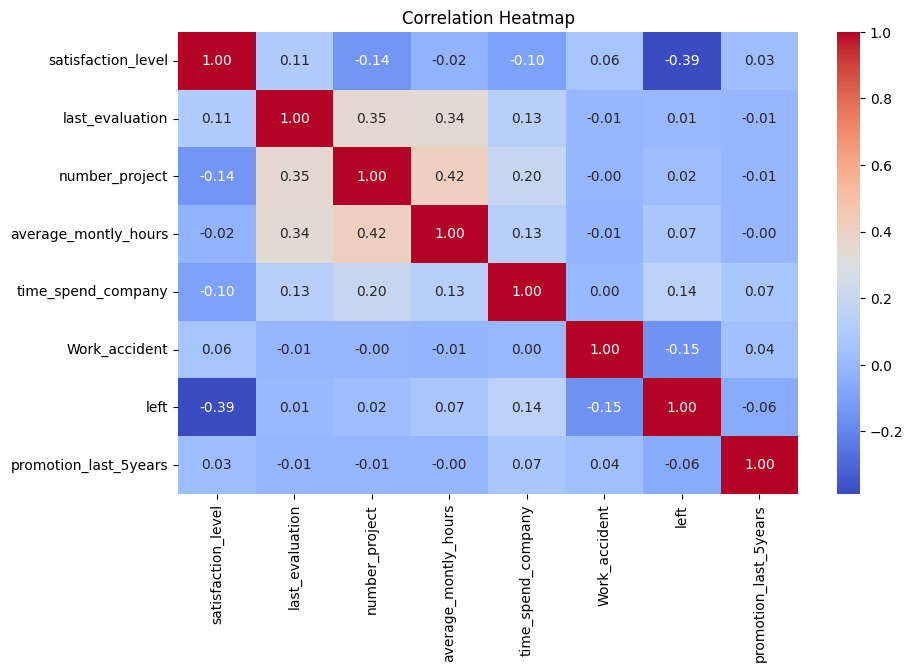

<ipython-input-37-88f3aa574130>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="left", data=df, palette="Set2")


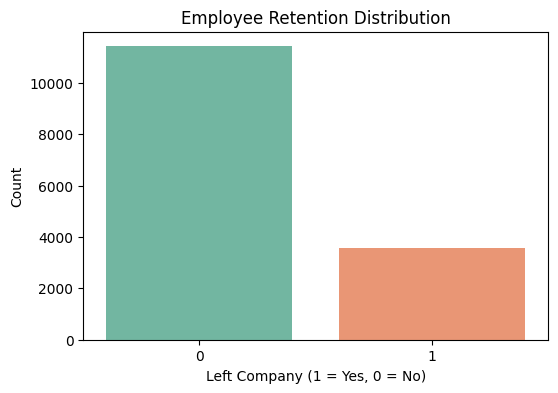

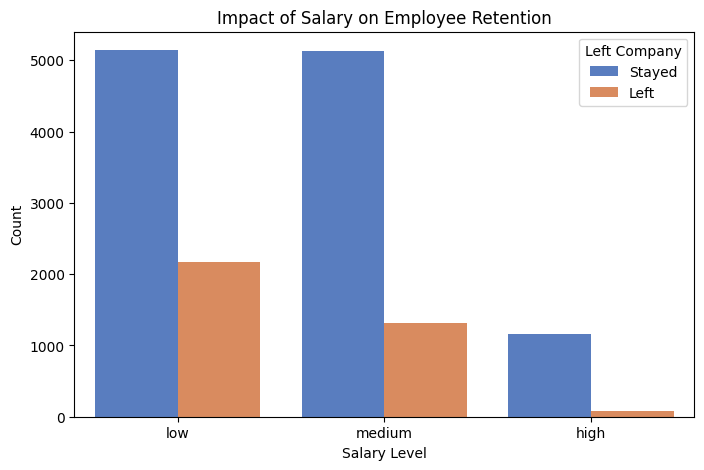

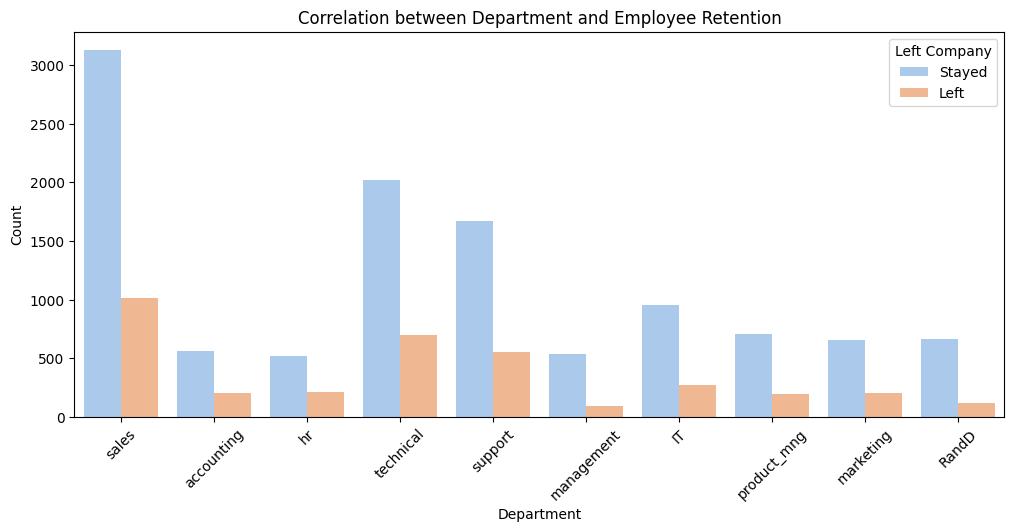

<ipython-input-37-88f3aa574130>:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.34123516  1.71343614  0.34365527 ... -0.34123516  0.34365527
 -0.34123516]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, :4] = scaler.fit_transform(X.iloc[:, :4])
<ipython-input-37-88f3aa574130>:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.46286291  0.97111292  2.59376348 ... -1.46286291  1.7824382
 -1.46286291]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, :4] = scaler.fit_transform(X.iloc[:, :4])
<ipython-input-37-88f3aa574130>:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.88203988  1.22042276  1.4206573  ... -1.16236823  1.58084493
 -0.86201642]' has dtype incompa

Model Accuracy: 0.76


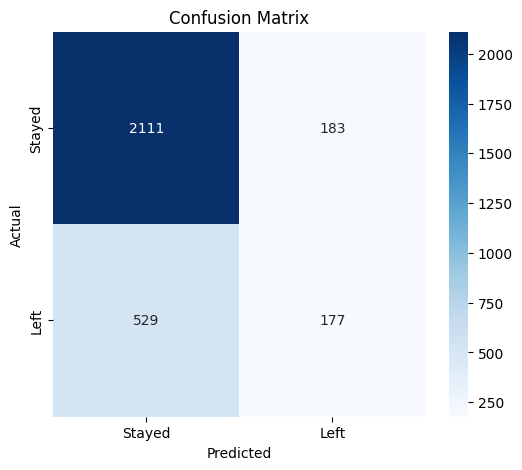

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
file_path = "/content/HR_comma_sep.csv"
df = pd.read_csv(file_path)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="left", data=df, palette="Set2")
plt.title("Employee Retention Distribution")
plt.xlabel("Left Company (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Impact of salary on employee retention
plt.figure(figsize=(8,5))
sns.countplot(x="salary", hue="left", data=df, palette="muted")
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.legend(title="Left Company", labels=["Stayed", "Left"])
plt.show()

# Correlation between department and employee retention
plt.figure(figsize=(12,5))
sns.countplot(x="Department", hue="left", data=df, palette="pastel")
plt.title("Correlation between Department and Employee Retention")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Left Company", labels=["Stayed", "Left"])
plt.show()

# Selecting important features
features = ["satisfaction_level", "time_spend_company", "number_project", "average_montly_hours", "salary", "Department"]
X = df[features]
y = df["left"]

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=["salary", "Department"], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X.iloc[:, :4] = scaler.fit_transform(X.iloc[:, :4])

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and measure accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 1.00


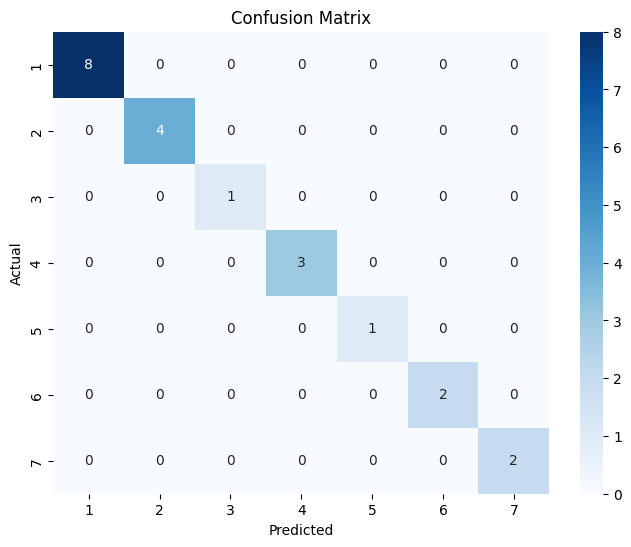

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the datasets
zoo_data = pd.read_csv("/content/zoo-data.csv")
zoo_classes = pd.read_csv("/content/zoo-class-type.csv")

# Merge datasets on class_type if needed
if 'class_type' in zoo_data.columns and 'class_type' in zoo_classes.columns:
    zoo_data = zoo_data.merge(zoo_classes, on='class_type', how='left')

# Separate features and target variable
X = zoo_data.drop(columns=['class_type', 'animal_name'])  # Assuming 'animal_name' is non-numeric
y = zoo_data['class_type']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
